In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
# upload the train dataset
df_train = pd.read_csv('./raw_data/train.csv')
print(f'df_train shape = {df_train.shape}')
df_train.head()

df_train shape = (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data exploration

Column names:
   - __battery_power__: Total energy a battery can store in one time measured in mAh;
   - __blue__: Has bluetooth or not;
   - __clock_speed__: speed at which microprocessor executes instructions;
   - __dual_sim__: Has dual sim support or not;
   - __fc__: Front Camera mega pixels;
   - __four_g__: Has 4G or not;
   - __int_memory__: Internal Memory in Gigabytes;
   - __m_dep__: Mobile Depth in cm;
   - __mobile_wt__: Weight of mobile phone;
   - __n_cores__: Number of cores of processor;
   - __pc__: Primary Camera mega pixels;
   - __px_height__: Pixel Resolution Height;
   - __px_width__: Pixel Resolution Width;
   - __ram__: Random Access Memory in Mega Bytes;
   - __sc_h__: Screen Height of mobile in cm;
   - __sc_w__: Screen Width of mobile in cm;
   - __talk_time__: longest time that a single battery charge will last when you are;
   - __three_g__: Has 3G or not;
   - __touch_screen__: Has touch screen or not;
   - __wifi__: Has wifi or not;
   - __price_range__: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
print(f'There are {df_train.duplicated().sum()} duplicated rows')

There are 0 duplicated rows


In [4]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df_train)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [7]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Categorical features

#### three_g and four_g

In [9]:
print(f"There are {df_train[(df_train['four_g']==0) & (df_train['three_g']==0)].shape[0]} mobile phones with no 3G or 4G")
print(f"There are {df_train[(df_train['four_g']==0) & (df_train['three_g']==1)].shape[0]} mobile phones with only 3G")
print(f"There are {df_train[(df_train['four_g']==1) & (df_train['three_g']==1)].shape[0]} mobile phones with 4G")

There are 477 mobile phones with no 3G or 4G
There are 480 mobile phones with only 3G
There are 1043 mobile phones with 4G


__Create a new column where:__
- if mobile phone has no 3G or 4G == 0
- if mobile phone has only 3G == 1
- if mobile phone has only 4G == 2

In [10]:
conditions = [
    (df_train['four_g'] == 0) & (df_train['three_g'] == 0),
    (df_train['four_g'] == 0) & (df_train['three_g'] == 1),
    (df_train['four_g'] == 1) & (df_train['three_g'] == 1)
]

# Define values corresponding to each condition
values = [0, 1, 2]

# Create the 'network' column based on conditions
df_train['network'] = np.select(conditions, values, default=np.nan)
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,network
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,2.0


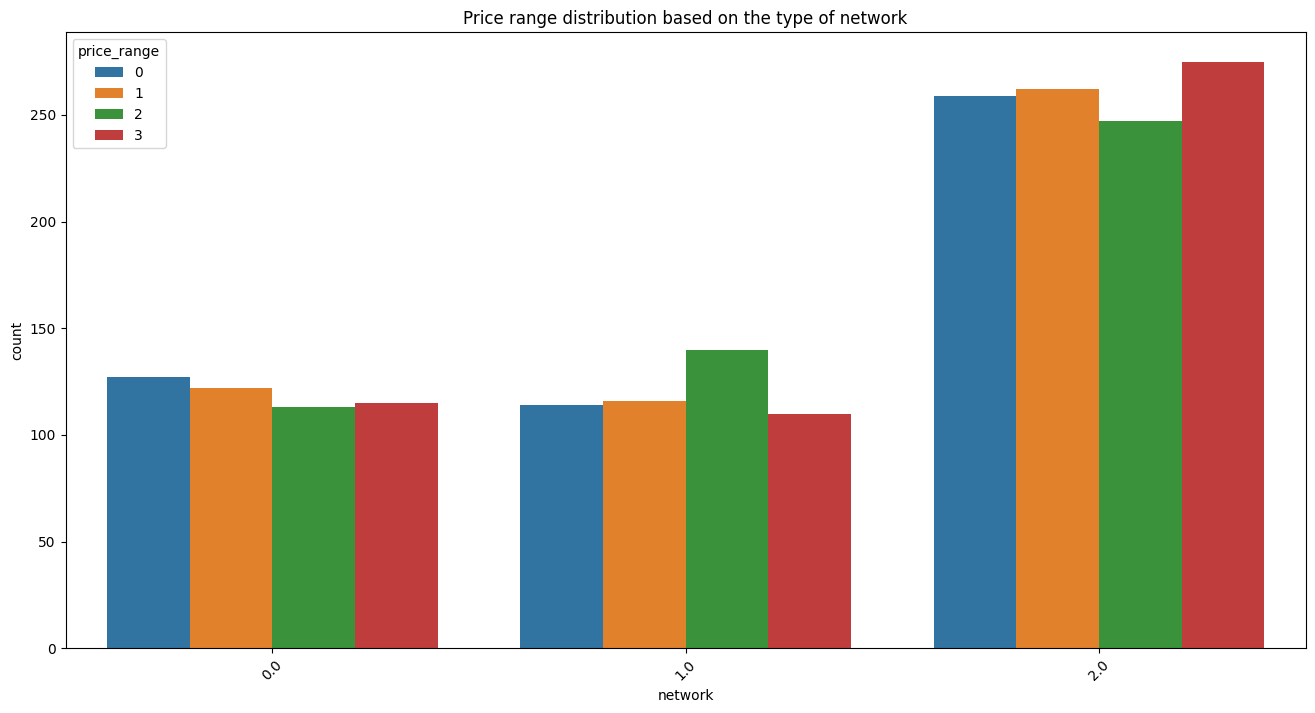

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='network', hue='price_range')
plt.title('Price range distribution based on the type of network')
plt.xticks(rotation=45)
plt.show()

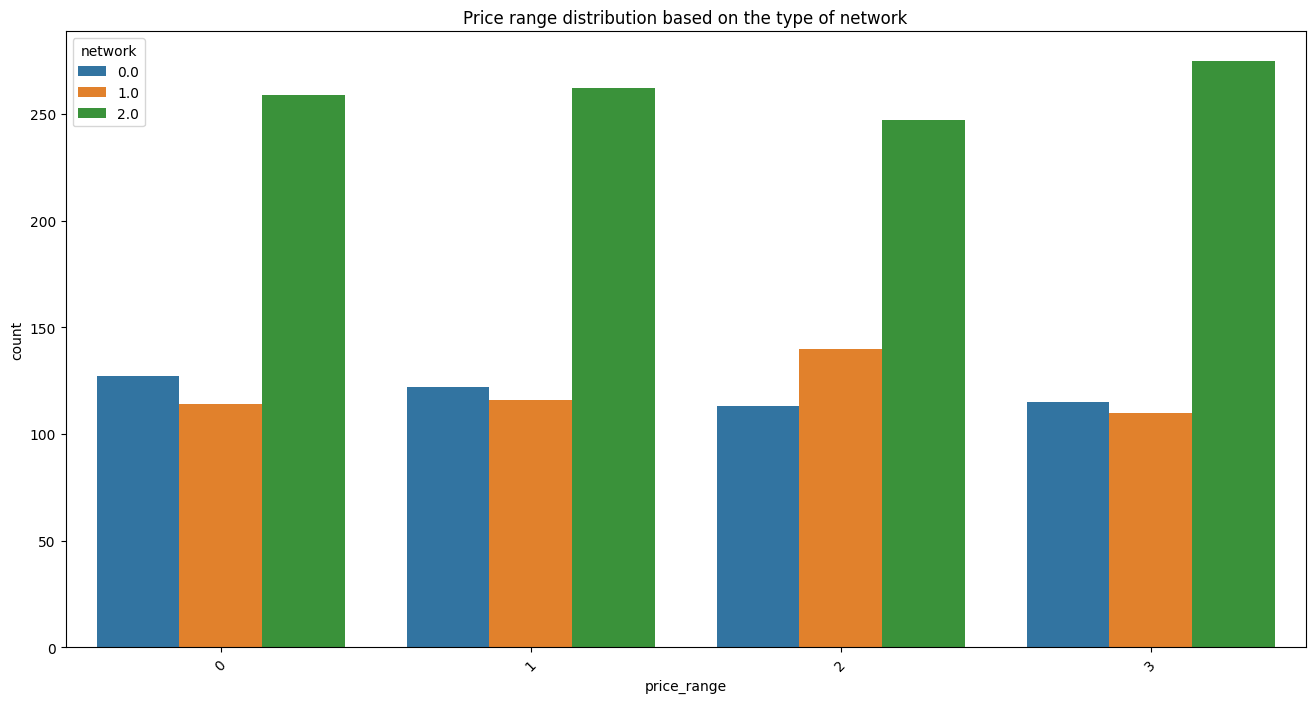

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='price_range', hue='network')
plt.title('Price range distribution based on the type of network')
plt.xticks(rotation=45)
plt.show()

the network doesn't seem to be too relevant to define the price_range of the mobile phone. as the previous plots show, there is a close amount of mobile phones in each price_range for the 3 network types

#### wifi

In [16]:
print(f"There are {df_train[df_train['wifi']==1].shape[0]} ({df_train[df_train['wifi']==1].shape[0]/len(df_train)*100}%) mobile phones with wifi")

There are 1014 (50.7%) mobile phones with wifi


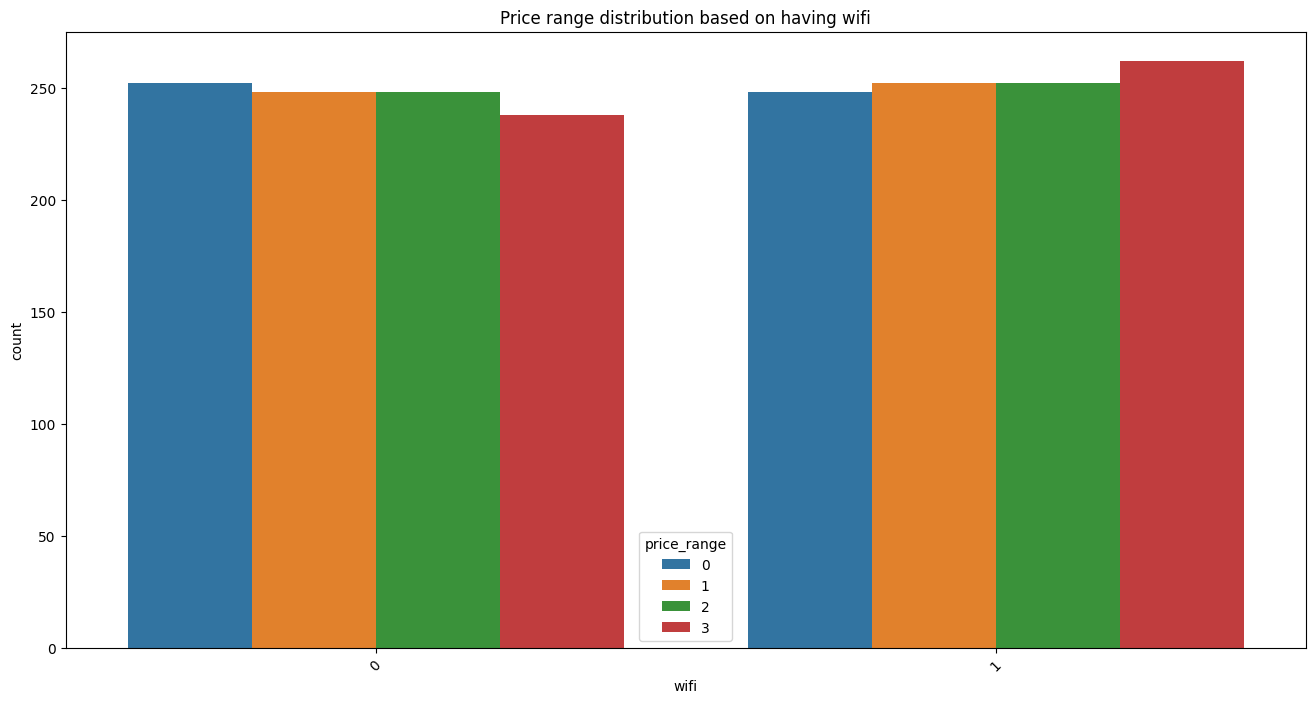

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='wifi', hue='price_range')
plt.title('Price range distribution based on having wifi')
plt.xticks(rotation=45)
plt.show()

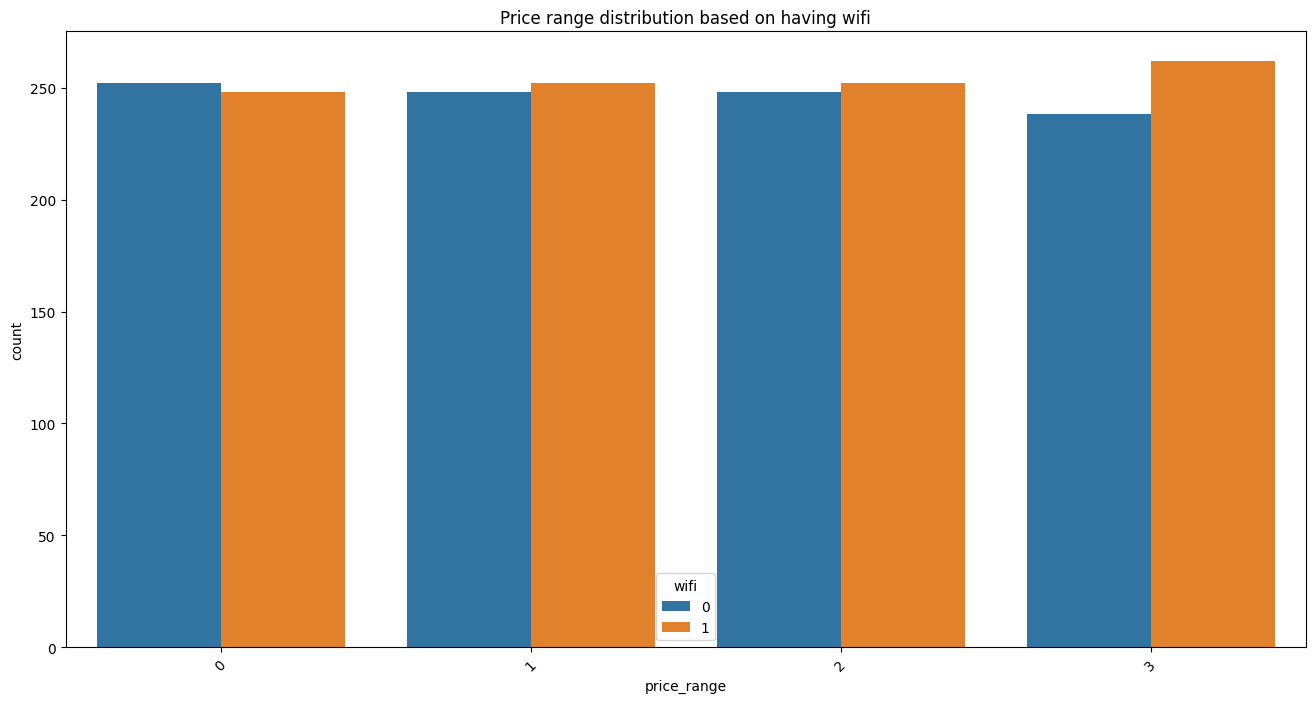

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='price_range', hue='wifi')
plt.title('Price range distribution based on having wifi')
plt.xticks(rotation=45)
plt.show()

Having wifi connection also appears not to change the mobile_phone price since all the categories in the price_range are balanced

#### bluetooth

In [19]:
print(f"There are {df_train[df_train['blue']==1].shape[0]} ({df_train[df_train['blue']==1].shape[0]/len(df_train)*100}%) mobile phones with bluetooth")

There are 990 (49.5%) mobile phones with bluetooth


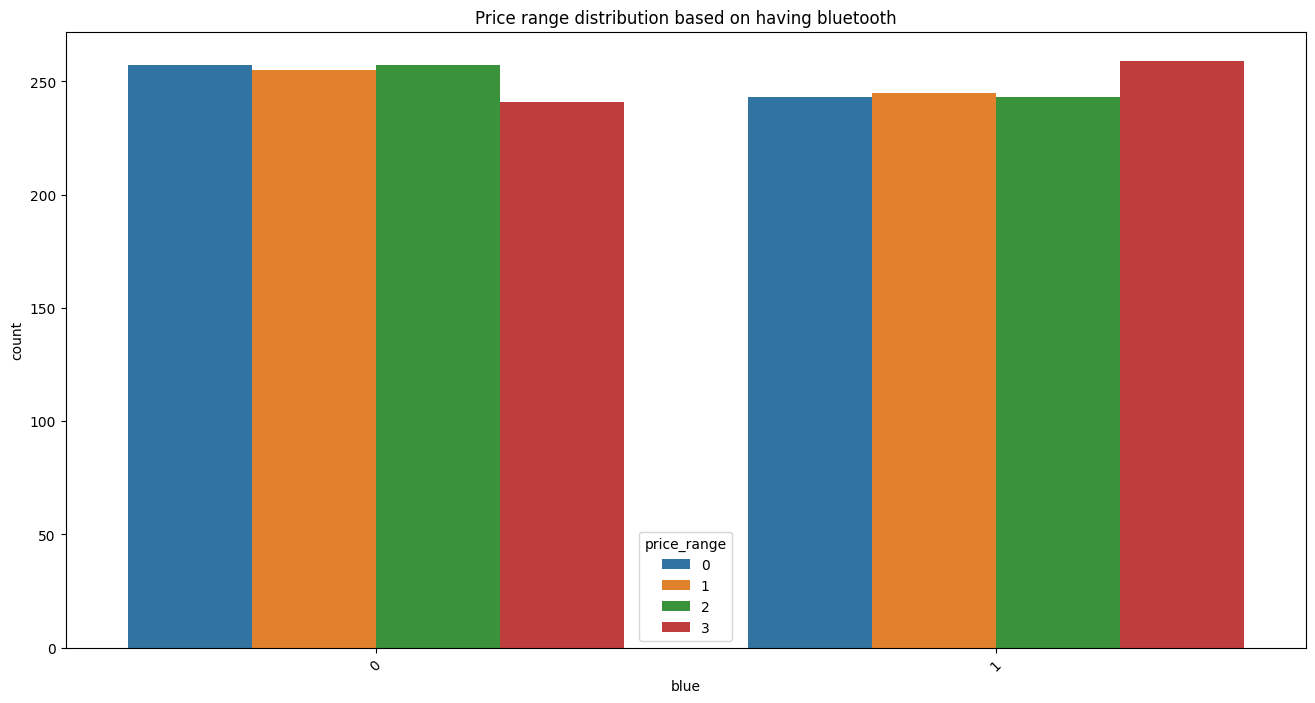

In [23]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='blue', hue='price_range')
plt.title('Price range distribution based on having bluetooth')
plt.xticks(rotation=45)
plt.show()

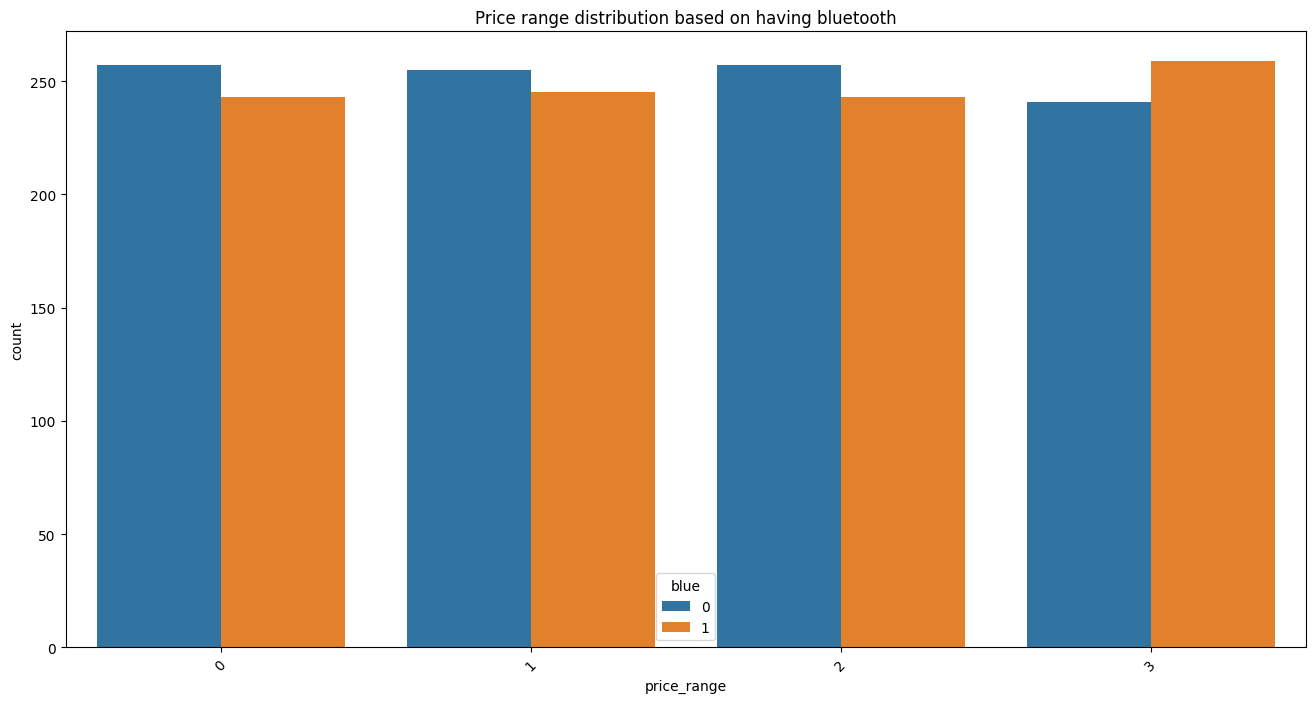

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='price_range', hue='blue')
plt.title('Price range distribution based on having bluetooth')
plt.xticks(rotation=45)
plt.show()

Despite there is a smaller amount of mobile phones with no bluetooth in price_range == 3 and a bigger amount of mobile phones with bluetooth in price_range == 3, these amounts are not significantly lower or higher, respectively, to withdraw some conclusion. It looks like having bluetooth is not what defines the price_range of a mobile phone

#### touch_screen

In [24]:
print(f"There are {df_train[df_train['touch_screen']==1].shape[0]} ({df_train[df_train['touch_screen']==1].shape[0]/len(df_train)*100}%) mobile phones with touch_screen")

There are 1006 (50.3%) mobile phones with touch_screen


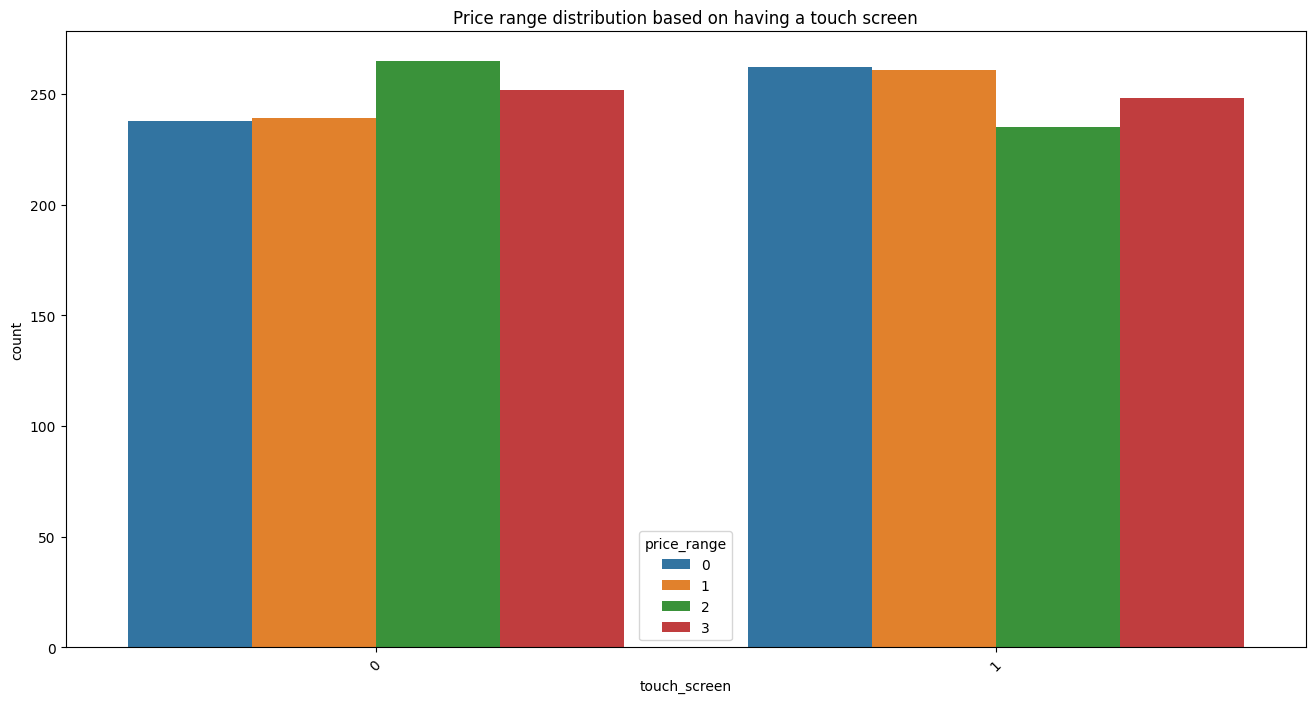

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='touch_screen', hue='price_range')
plt.title('Price range distribution based on having a touch screen')
plt.xticks(rotation=45)
plt.show()

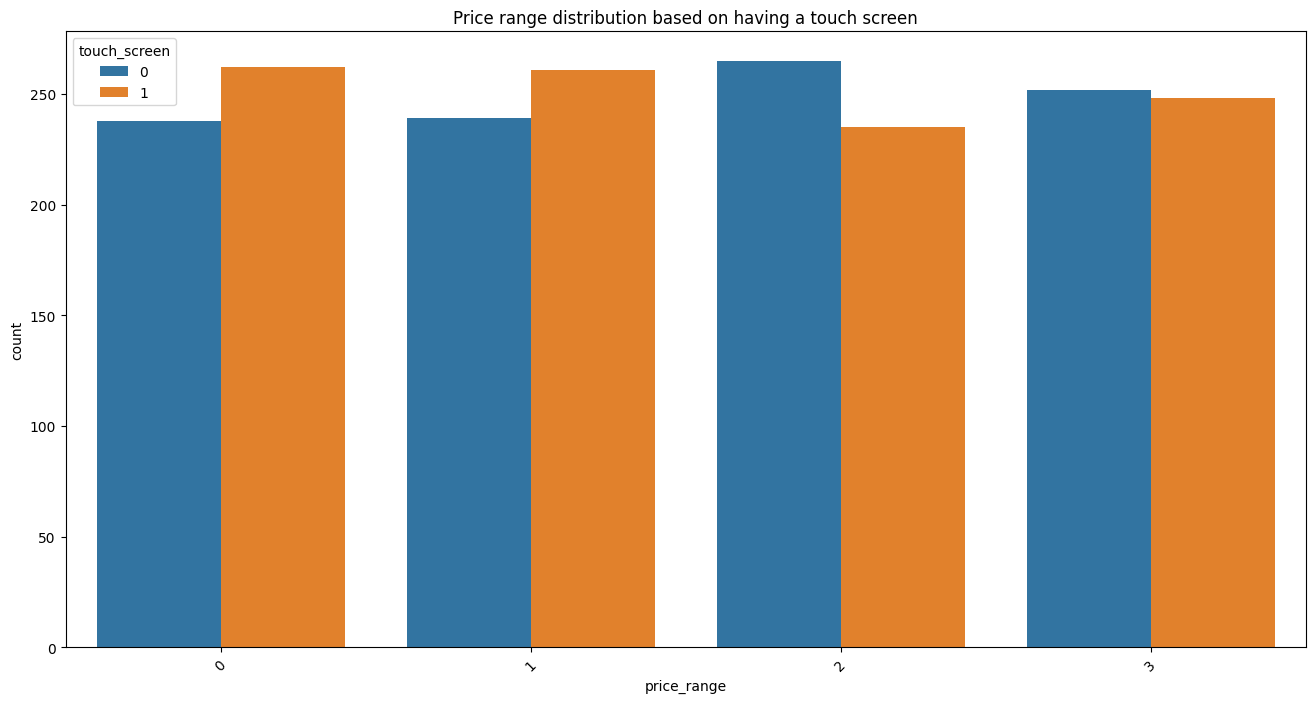

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='price_range', hue='touch_screen')
plt.title('Price range distribution based on having a touch screen')
plt.xticks(rotation=45)
plt.show()

Again, the amount of mobile phones with and without touch screen seems pretty balanced in each price_range category

#### dual_sim

In [30]:
print(f"There are {df_train[df_train['dual_sim']==1].shape[0]} ({df_train[df_train['dual_sim']==1].shape[0]/len(df_train)*100}%) mobile phones with dual sim")

There are 1019 (50.949999999999996%) mobile phones with dual sim


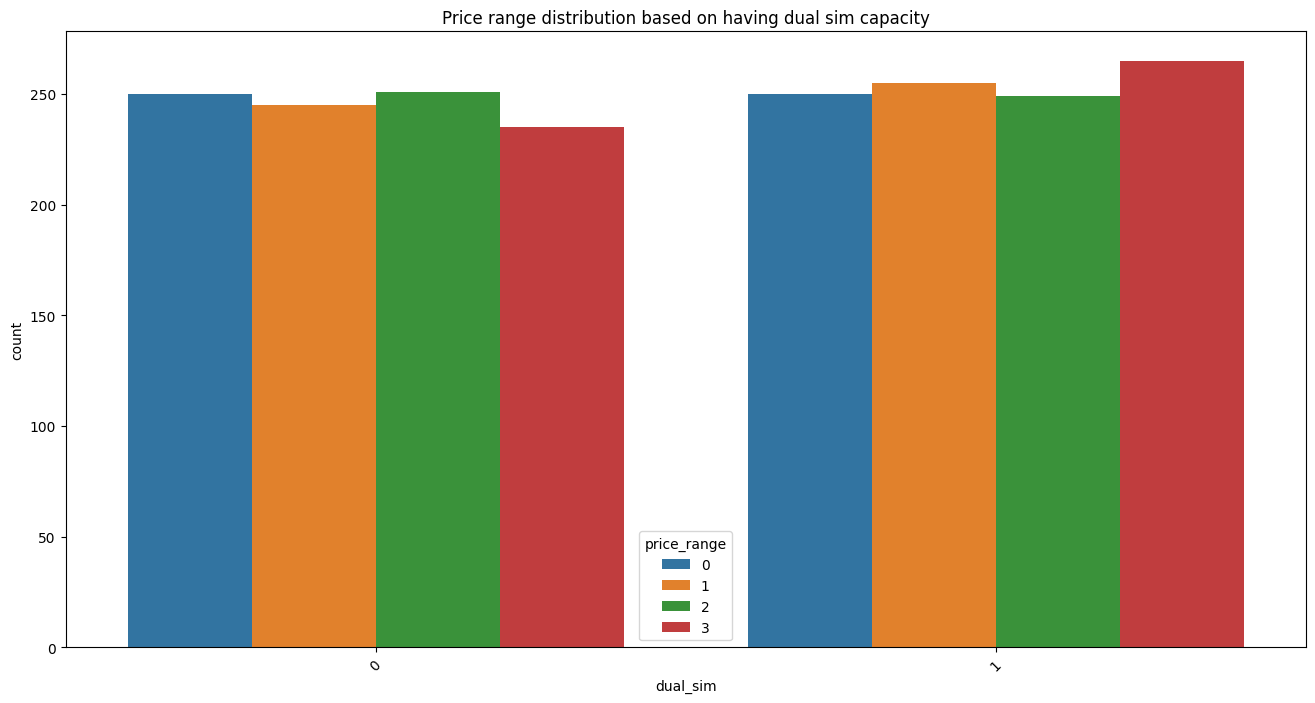

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='dual_sim', hue='price_range')
plt.title('Price range distribution based on having dual sim capacity')
plt.xticks(rotation=45)
plt.show()

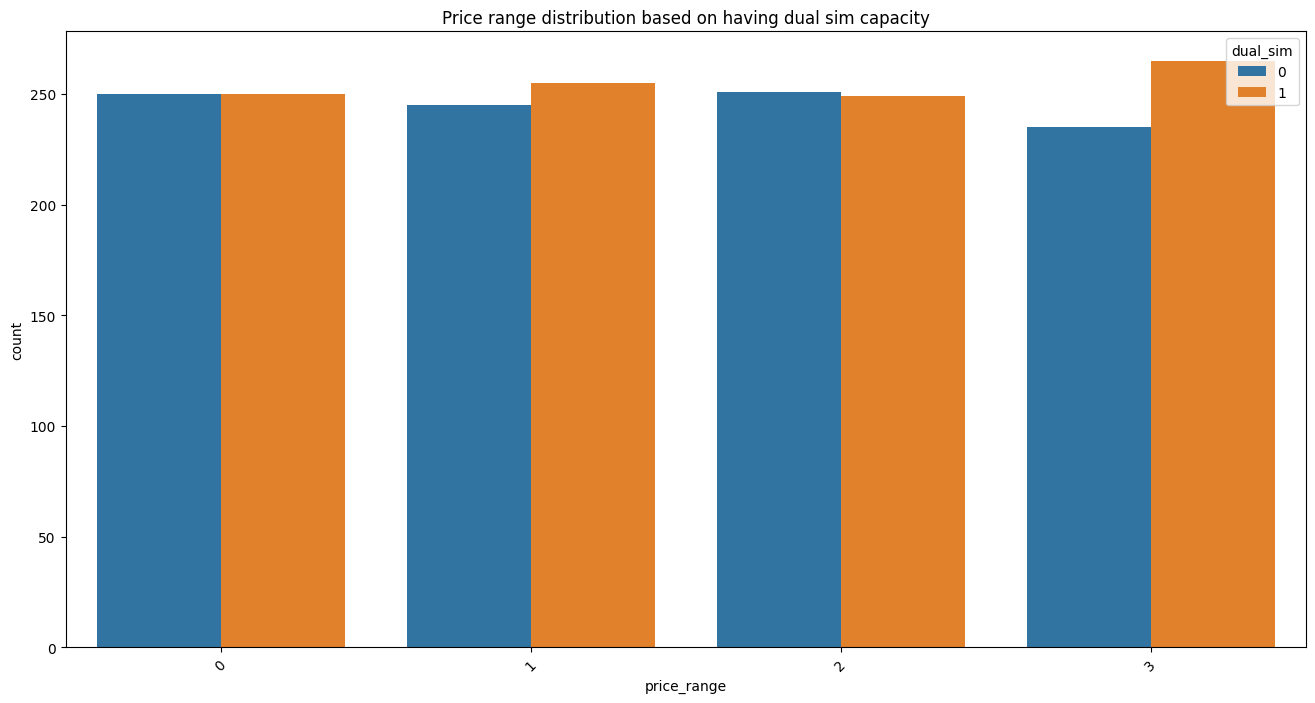

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='price_range', hue='dual_sim')
plt.title('Price range distribution based on having dual sim capacity')
plt.xticks(rotation=45)
plt.show()

#### n_cores

In [27]:
df_train['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

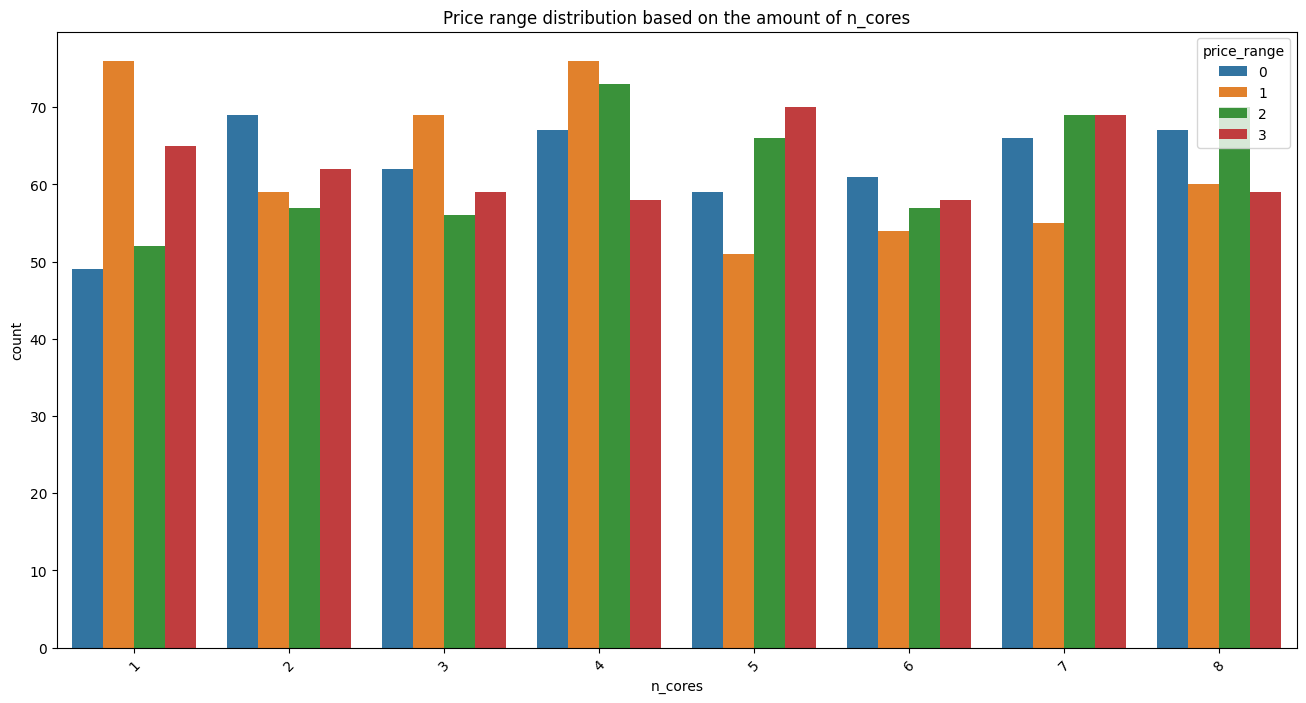

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='n_cores', hue='price_range')
plt.title('Price range distribution based on the amount of n_cores')
plt.xticks(rotation=45)
plt.show()

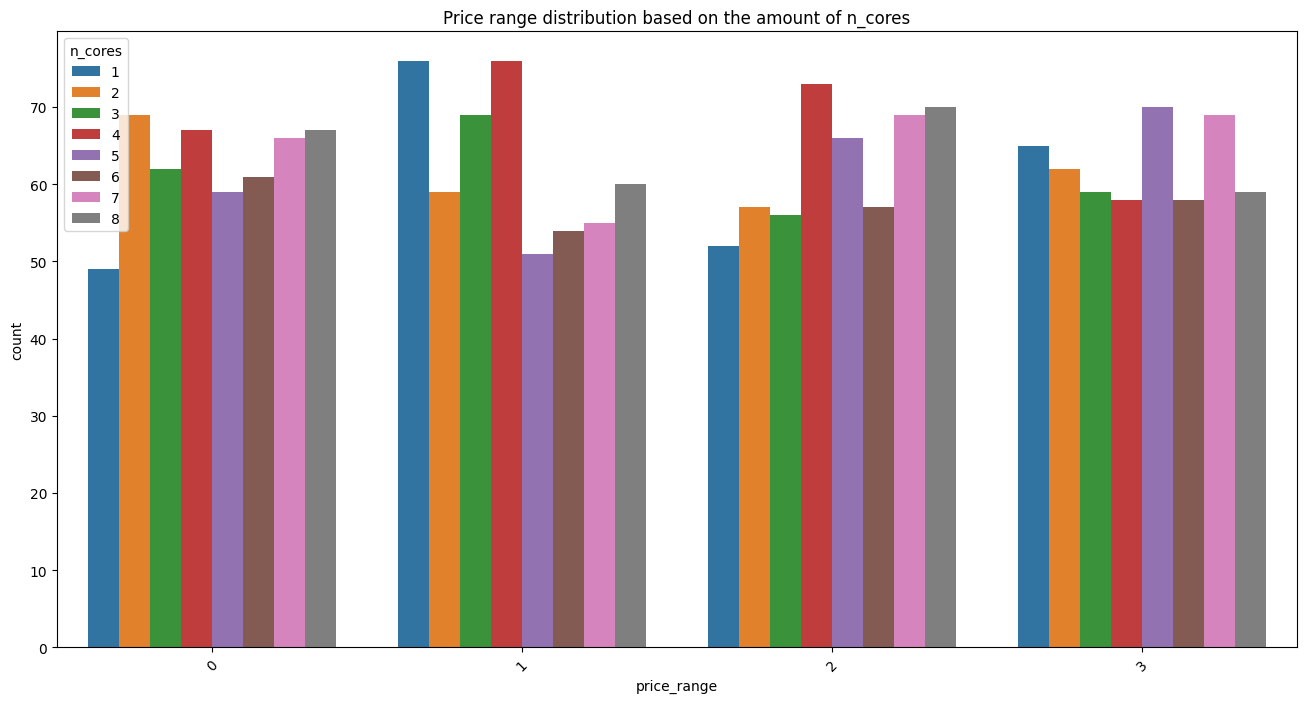

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_train, x='price_range', hue='n_cores')
plt.title('Price range distribution based on the amount of n_cores')
plt.xticks(rotation=45)
plt.show()

the amount of n_cores doesn't seem to change the price_range of mobile phones

#### all

In [46]:
def plot_price_distribution(df, variable):
    
    plt.figure(figsize=(16, 3))
    
    # plot 1
    plt.subplot(1, 2, 1) 
    sns.countplot(data=df, x=variable, hue='price_range')
    plt.title(f'Price Range Distribution based on {variable}')
    plt.xticks(rotation=45)
    
    #plot 2
    plt.subplot(1, 2, 2) 
    sns.countplot(data=df, x='price_range', hue=variable)
    plt.title(f'Price Range Distribution based on {variable}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

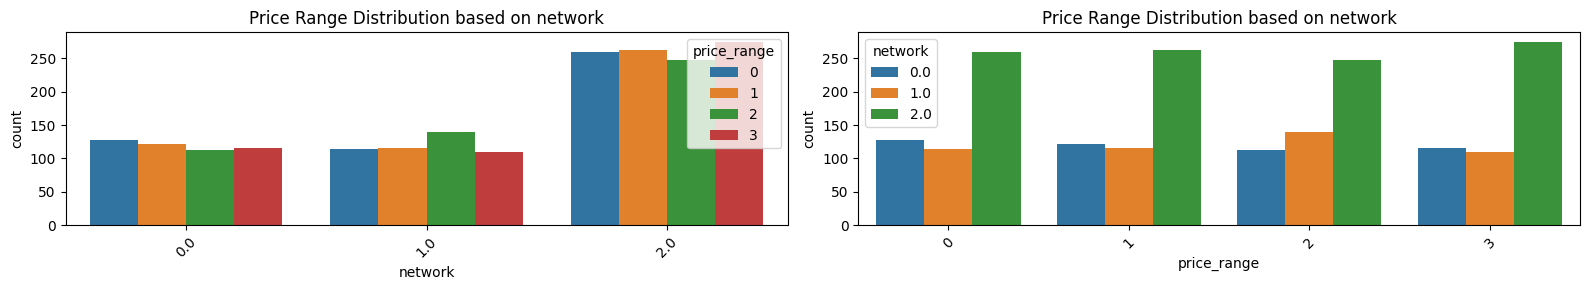

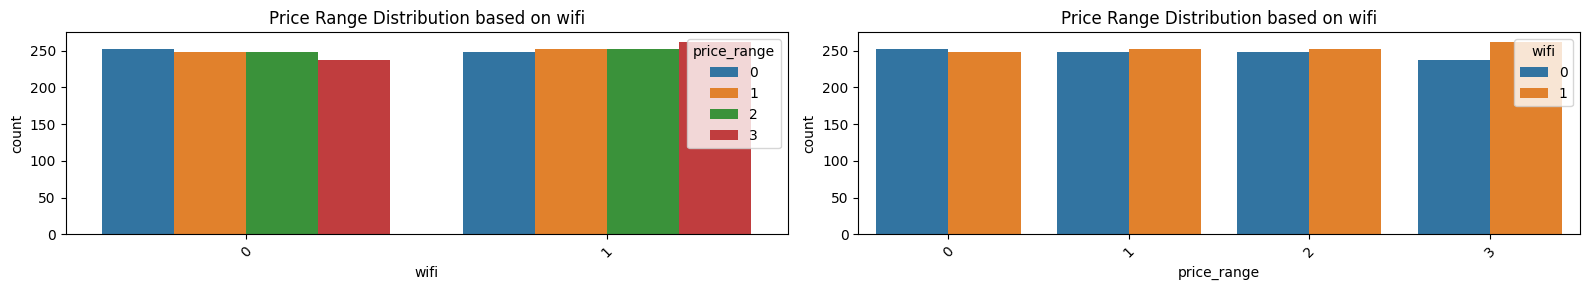

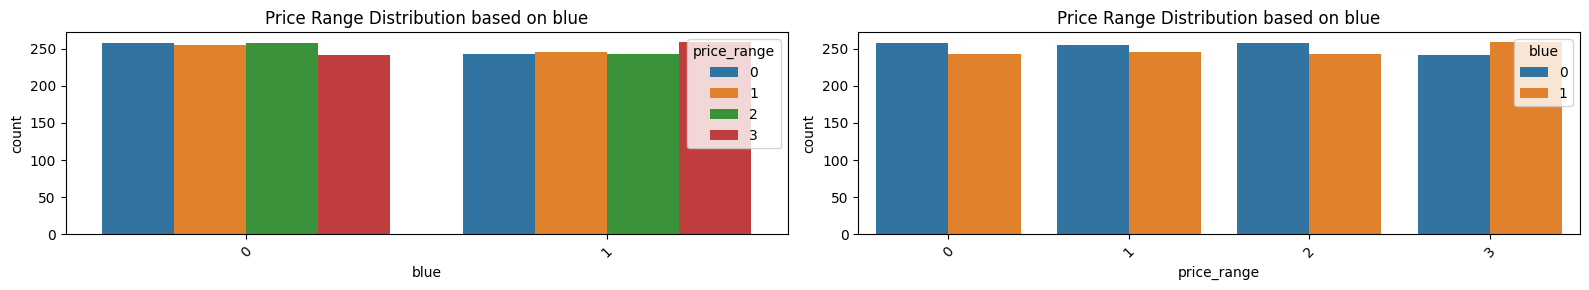

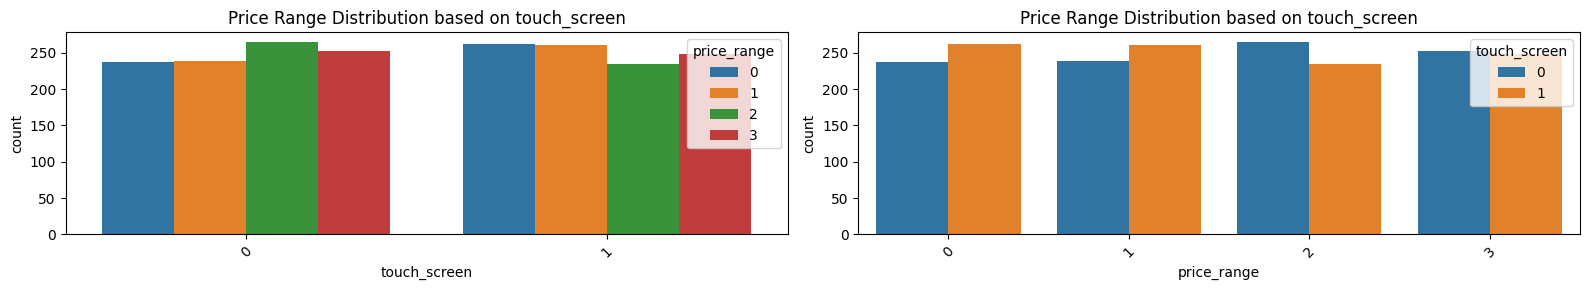

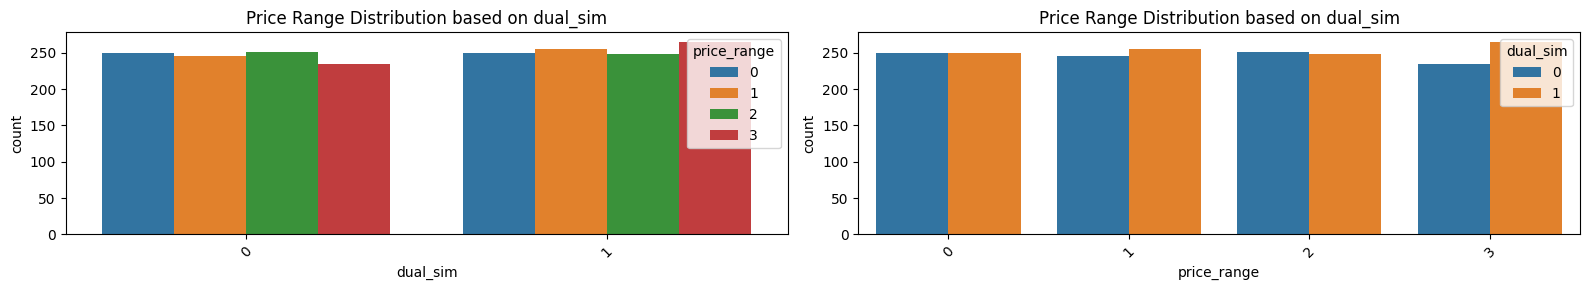

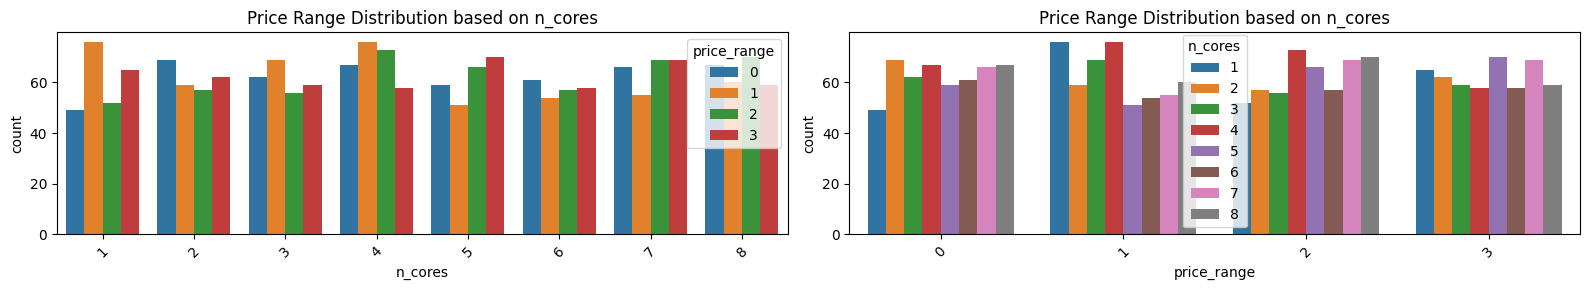

In [47]:
variables_to_plot = ['network', 'wifi', 'blue', 'touch_screen', 'dual_sim', 'n_cores']

for i, variable in enumerate(variables_to_plot):
    plot_price_distribution(df_train, variable)

